Selamat datang di permainan Go (9x9). Anda bermain sebagai Hitam (1) dan AI sebagai Putih (2).


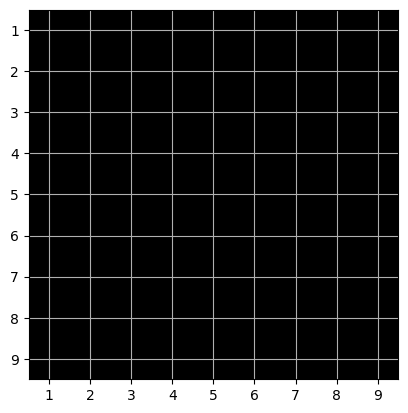


Giliran Anda (Hitam).
Input tidak valid. Masukkan angka baris dan kolom yang dipisah dengan spasi.


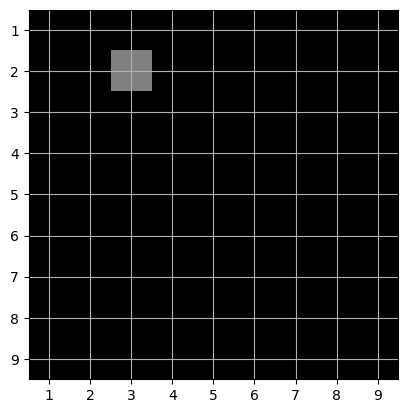


Giliran AI (Putih).
AI memilih langkah di (7, 1)


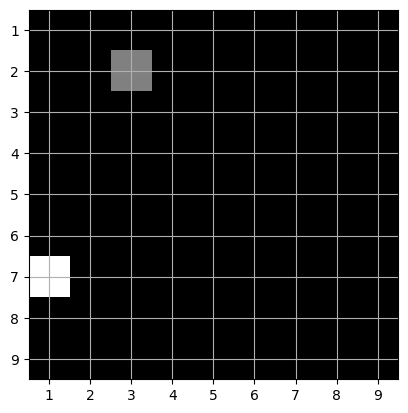


Giliran Anda (Hitam).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Inisialisasi ukuran papan
BOARD_SIZE = 9
EMPTY = 0
BLACK = 1
WHITE = 2

# Fungsi untuk membuat papan kosong
def initialize_board():
    return np.zeros((BOARD_SIZE, BOARD_SIZE), dtype=int)

# Fungsi untuk menampilkan papan menggunakan matplotlib
def display_board(board):
    plt.imshow(board, cmap='gray', vmin=0, vmax=2)
    plt.xticks(np.arange(BOARD_SIZE), np.arange(1, BOARD_SIZE+1))
    plt.yticks(np.arange(BOARD_SIZE), np.arange(1, BOARD_SIZE+1))
    plt.grid(True)
    plt.show()

# Fungsi untuk memeriksa apakah langkah valid (kosong)
def is_valid_move(board, x, y):
    return board[x, y] == EMPTY

# Fungsi untuk mengambil input dari pemain manusia
def player_move(board, player_color):
    while True:
        try:
            x, y = map(int, input(f"Masukkan langkah (baris dan kolom, misal: 2 3): ").split())
            x -= 1  # Konversi ke indeks 0
            y -= 1
            if is_valid_move(board, x, y):
                board[x, y] = player_color
                break
            else:
                print("Posisi tersebut sudah diisi atau tidak valid. Silakan coba lagi.")
        except ValueError:
            print("Input tidak valid. Masukkan angka baris dan kolom yang dipisah dengan spasi.")

# Fungsi untuk AI memilih langkah acak
def ai_move(board, ai_color):
    available_moves = [(i, j) for i in range(BOARD_SIZE) for j in range(BOARD_SIZE) if board[i, j] == EMPTY]
    if available_moves:
        x, y = random.choice(available_moves)
        print(f"AI memilih langkah di ({x+1}, {y+1})")
        board[x, y] = ai_color

# Fungsi utama permainan
def main():
    board = initialize_board()
    turn = BLACK  # Pemain manusia bermain hitam
    ai_color = WHITE

    print("Selamat datang di permainan Go (9x9). Anda bermain sebagai Hitam (1) dan AI sebagai Putih (2).")
    display_board(board)

    while True:
        if turn == BLACK:
            print("\nGiliran Anda (Hitam).")
            player_move(board, BLACK)
            turn = WHITE  # Beri giliran ke AI
        else:
            print("\nGiliran AI (Putih).")
            ai_move(board, WHITE)
            turn = BLACK  # Kembali ke pemain manusia
        
        display_board(board)

        # Periksa apakah ada langkah tersisa
        if np.all(board != EMPTY):
            print("Papan penuh, permainan selesai.")
            break

if __name__ == "__main__":
    main()
